# Notebook 5B: Data Cleaning and Auto ML for Bank Marketing Data

Conceptualized, organized and prepared by: Christopher Monterola



#Example 1: Bank Marketing

Bank Marketing Data Set 

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the client will subscribe (yes/no) a term deposit (variable y).




Attribute Information:

Input variables:
#### Bank client data:  
1 - age (numeric)   
2 - job : type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')   
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)   
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')   
5 - default: has credit in default? (categorical: 'no','yes','unknown')   
6 - housing: has housing loan? (categorical: 'no','yes','unknown')   
7 - loan: has personal loan? (categorical: 'no','yes','unknown')   
   
#### Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')    
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')   
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')   
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.    

#### Other attributes:   
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)   
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)   
14 - previous: number of contacts performed before this campaign and for this client (numeric)   
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')    

 Social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)   
17 - cons.price.idx: consumer price index - monthly indicator (numeric)    
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)    
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)   
20 - nr.employed: number of employees - quarterly indicator (numeric)   

#### Output variable (desired target):  
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')  


Relevant Papers:  

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
#warnings.filterwarnings("ignore", category=DataConversionWarning)

#from warnings import simplefilter
#from sklearn.exceptions import ConvergenceWarning
#simplefilter("ignore", category=ConvergenceWarning)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# data_dir = '/content/drive/MyDrive/Teaching/ML1_MSDS2022/Notebook 5/'
data_dir = ''

In [4]:
df_bank = pd.read_excel(data_dir+'bank_dirty_500.xlsx', sheet_name="Sheet1")
dummy = df_bank
dummy.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,59,self-employed,married,university.degree,no,yes,no,cellular,may,tue,...,1.0,999.0,1.0,failure,-1.8,92.893,-46.2,1.266,5099.1,no
1,31,services,single,high.school,no,no,yes,cellular,jul,thu,...,17.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
2,31,admin.,married,professional.course,no,no,yes,cellular,dec,mon,...,2.0,999.0,1.0,failure,-3.0,92.713,-33.0,0.709,5023.5,yes
3,34,admin.,married,high.school,no,yes,yes,telephone,may,fri,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
4,37,admin.,married,high.school,unknown,yes,no,cellular,jul,mon,...,3.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


In [5]:
print(df_bank.shape)

(500, 21)


In [6]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

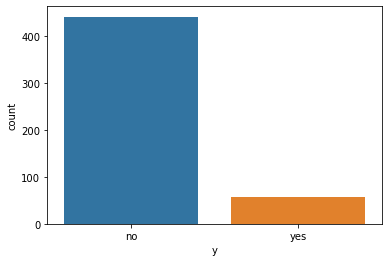

In [7]:
import seaborn as sns
sns.countplot(df_bank['y'],label="Count")
plt.show()

In [8]:
df_bank.groupby('y').size()

y
no     442
yes     58
dtype: int64

In [9]:
df_bank.groupby('y').size()[0]/df_bank.groupby('y').size().sum()

0.884

In [10]:
num=(df_bank.groupby('y').size()/df_bank.groupby('y').size().sum())**2
#print("Population per class: {}\n".format(df_state))
print("Proportion Chance Criterion = {}%".format(100*num.sum()))
print("1.25*Proportion Chance Criterion = {}%".format(1.25*100*num.sum()))

Proportion Chance Criterion = 79.4912%
1.25*Proportion Chance Criterion = 99.364%


# Step 1: Look at the missing values

In [11]:
df_bank.isnull().sum()

age                0
job                1
marital            3
education          7
default            5
housing            9
loan               7
contact           15
month             10
day_of_week        6
duration           8
campaign           4
pdays              5
previous           4
poutcome           5
emp.var.rate       4
cons.price.idx     6
cons.conf.idx      1
euribor3m          1
nr.employed        0
y                  0
dtype: int64

In [12]:
df_bank.values

array([[59, 'self-employed', 'married', ..., 1.266, 5099.1, 'no'],
       [31, 'services', 'single', ..., 4.968, 5228.1, 'no'],
       [31, 'admin.', 'married', ..., 0.709, 5023.5, 'yes'],
       ...,
       [60, 'blue-collar', 'divorced', ..., 4.963, 5228.1, 'no'],
       [26, 'blue-collar', 'single', ..., 4.96, 5228.1, 'no'],
       [37, 'management', 'married', ..., 4.961, 5228.1, 'no']],
      dtype=object)

# Steps 2 and 3. Remove or Imput the missing values


In [13]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)



X_transition = pd.DataFrame(df_bank)
X_clean = DataFrameImputer().fit_transform(X_transition)

X_clean.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [14]:
X_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,59,self-employed,married,university.degree,no,yes,no,cellular,may,tue,...,1.0,999.0,1.0,failure,-1.8,92.893,-46.2,1.266,5099.1,no
1,31,services,single,high.school,no,no,yes,cellular,jul,thu,...,17.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
2,31,admin.,married,professional.course,no,no,yes,cellular,dec,mon,...,2.0,999.0,1.0,failure,-3.0,92.713,-33.0,0.709,5023.5,yes
3,34,admin.,married,high.school,no,yes,yes,telephone,may,fri,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
4,37,admin.,married,high.school,unknown,yes,no,cellular,jul,mon,...,3.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


In [15]:
X_clean.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [16]:
X_clean = X_clean.drop('y', axis=1)  # REMOVE THE TARGET VARIABLE
#X_clean = X_clean.drop('duration', axis=1)  # REMOVE THE TARGET VARIABLE

We can see that the numerical values do not have the same scale. We will need to apply scaling to the test set that we computed for the training set.

# Step 4. Handle Categorical Data

For simplicity let's just One Hat Encode all the categorical values

In [17]:
XX=pd.get_dummies(X_clean)

In [18]:
XX.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,59,61.0,1.0,999.0,1.0,-1.8,92.893,-46.2,1.266,5099.1,...,0,0,0,0,0,1,0,1,0,0
1,31,9.0,17.0,999.0,0.0,1.4,93.918,-42.7,4.968,5228.1,...,0,0,0,0,1,0,0,0,1,0
2,31,367.0,2.0,999.0,1.0,-3.0,92.713,-33.0,0.709,5023.5,...,0,0,0,1,0,0,0,1,0,0
3,34,20.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
4,37,204.0,3.0,999.0,0.0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,0,1,0,0,0,0,1,0


In [19]:
X_clean.shape

(500, 20)

In [20]:
XX.shape

(500, 60)

In [21]:
XX_column_names =XX.columns

# Step 5: Apply Scaler

In [22]:
from sklearn.preprocessing import MinMaxScaler
sscaler = MinMaxScaler()
XX = sscaler.fit_transform(XX.astype(np.float)) #You will loss the column names

<ipython-input-22-48906f178271>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  XX = sscaler.fit_transform(XX.astype(np.float)) #You will loss the column names


In [23]:
XX

array([[0.84444444, 0.01539307, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.22222222, 0.00109951, 0.69565217, ..., 0.        , 1.        ,
        0.        ],
       [0.22222222, 0.09950522, 0.04347826, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.86666667, 0.02748763, 0.08695652, ..., 0.        , 1.        ,
        0.        ],
       [0.11111111, 0.05360088, 0.04347826, ..., 0.        , 1.        ,
        0.        ],
       [0.35555556, 0.07778999, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [24]:
XX_df = pd.DataFrame(data = XX,columns = XX_column_names) # Return the column names
XX_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.844444,0.015393,0.000000,1.0,0.166667,0.333333,0.269680,0.192469,0.143980,0.512287,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.222222,0.001100,0.695652,1.0,0.000000,1.000000,0.669135,0.338912,0.999538,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.222222,0.099505,0.043478,1.0,0.166667,0.083333,0.199532,0.744770,0.015253,0.226465,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.288889,0.004123,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.973423,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.355556,0.054700,0.086957,1.0,0.000000,1.000000,0.669135,0.338912,0.998151,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Step 6:  Now let's run an automated Machine Learning to the above processed data

Below we combine the notebook codes previously shared into a single running code to create an **Automated ML**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

Number_trials=10

def train_knn(X, y):
    score_train = []
    score_test = []

    for seed in range(Number_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        neighbors_settings = range(1,70)
        acc_train = []
        acc_test = []

        for n_neighbors in neighbors_settings:   
            clf = KNeighborsClassifier(n_neighbors=n_neighbors) # build the model 
            clf.fit(X_train, y_train)    
            acc_train.append(clf.score(X_train, y_train))
            acc_test.append(clf.score(X_test, y_test))

        score_train.append(acc_train)
        score_test.append(acc_test)   
        
    score = np.mean(score_test, axis=0)
    run_time = (time.time() - start_time)
    return ['kNN', np.amax(score), 'N_Neighbor = {0}'.format(np.argmax(score)+1), 'NA',run_time]

def train_logistic(X, y, reg):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                lr = LogisticRegression(C=alpha_run, penalty=reg, solver='liblinear').fit(X_train, y_train)
            if reg == 'l2':
                lr = LogisticRegression(C=alpha_run, penalty=reg, dual=False).fit(X_train, y_train)
            
            
            training_accuracy.append(lr.score(X_train, y_train))
            test_accuracy.append(lr.score(X_test, y_test))
            coefs=lr.coef_ 
            weighted_coefs.append(coefs) #append all the computed coefficients per trial
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
    
    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials 
    #print(mean_coefs) 
    score = np.mean(score_test, axis=0)
    
    #Plot the weight of the parameters 
    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,15))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
     
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Logistic ({0})'.format(reg), np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), top_predictor, run_time]

def train_svm(X, y, reg):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                svc = LinearSVC(C=alpha_run, penalty=reg, loss='squared_hinge', dual=False).fit(X_train, y_train)
            if reg == 'l2':
                svc = LinearSVC(C=alpha_run, penalty=reg).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = svc.coef_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,20))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Linear SVM ({0})'.format(reg), np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), top_predictor,run_time]




['kNN', 0.892, 'N_Neighbor = 13', 'NA', 18.101550817489624]
18.101550817489624 seconds
['Logistic (l2)', 0.8944000000000001, 'C = 0.75', 'duration', 3.6395511627197266]
3.6395511627197266 seconds
['Logistic (l1)', 0.9112, 'C = 1', 'duration', 7.231949806213379]
7.231949806213379 seconds
['Linear SVM (l2)', 0.8992000000000001, 'C = 0.2', 'duration', 2.7874045372009277]
2.7874045372009277 seconds
['Linear SVM (l1)', 0.9088, 'C = 0.4', 'duration', 6.092459678649902]
6.092459678649902 seconds


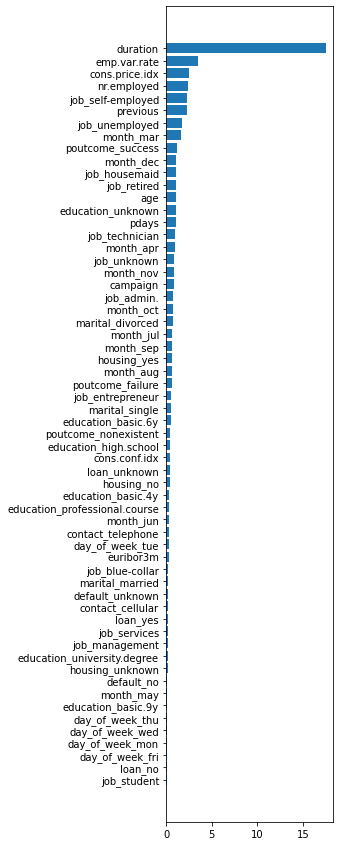

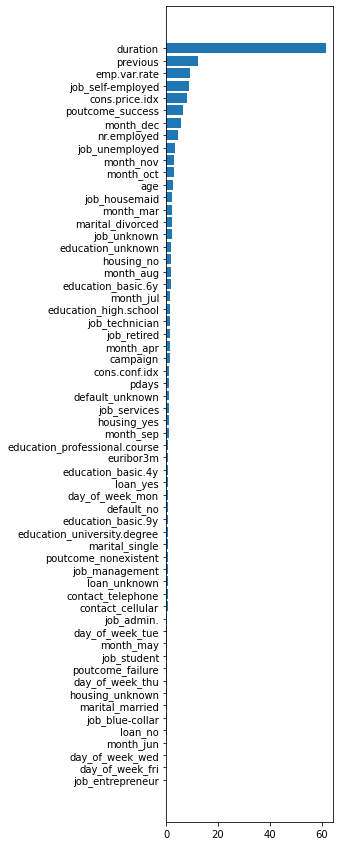

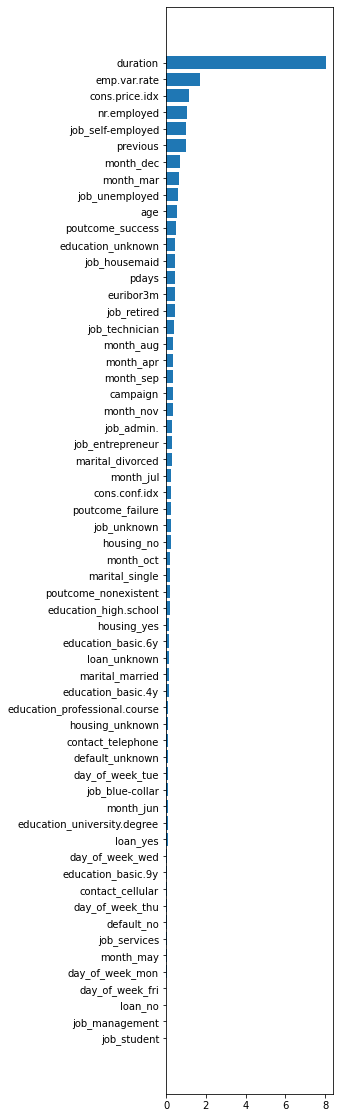

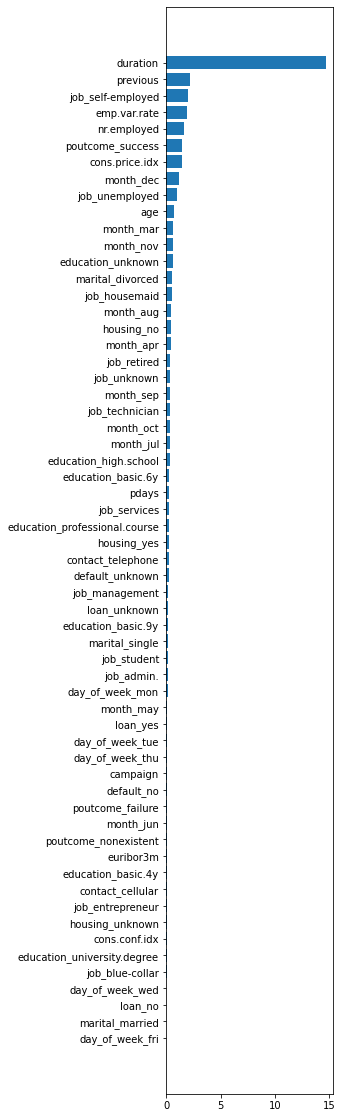

In [26]:
X = XX_df
y = df_bank['y']

import time

start_time = time.time()
a = train_knn(X,y)
print(a)
print("%s seconds" % a[4])

start_time = time.time()
b = train_logistic(X,y,reg='l2')
print(b)
print("%s seconds" % b[4])

start_time = time.time()
c = train_logistic(X,y,reg='l1')
print(c)
print("%s seconds" % c[4])

start_time = time.time()
d = train_svm(X,y,reg='l2')
print(d)
print("%s seconds" % d[4])

start_time = time.time()
e = train_svm(X,y,reg='l1')
print(e)
print("%s seconds" % e[4])


In [27]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable', 'Run Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c
df2.loc[3] = d
df2.loc[4] = e

df2

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable,Run Time
0,kNN,0.8920,N_Neighbor = 13,NA,18.101551
1,Logistic (l2),0.8944,C = 0.75,duration,3.639551
2,Logistic (l1),0.9112,C = 1,duration,7.231950
3,Linear SVM (l2),0.8992,C = 0.2,duration,2.787405
4,Linear SVM (l1),0.9088,C = 0.4,duration,6.092460
